# Loan Approval Prediction: End-to-End Machine Learning Project
This notebook provides a comprehensive, step-by-step workflow for predicting loan approval status using a real-world dataset. It covers data loading, exploratory data analysis, preprocessing, feature engineering, model training, hyperparameter tuning, and model comparison. The goal is to build and evaluate classification models that can accurately predict whether a loan application will be approved.

### Import Necessary Libraries

In [46]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview
The dataset used in this project contains information about loan applicants, including demographic details, financial attributes, and loan status. It consists of a training set and a test set, both in CSV format. The training set is used for model development and evaluation, while the test set is reserved for final predictions. Key features include applicant income, loan amount, credit history, and categorical variables such as gender, marital status, and property area.

### Loading the Dataset

In [47]:
train_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/train_u6lujuX_CVtuZ9i.csv")
test_data = pd.read_csv("D:/Machine Learning/Loan-Approval-Prediction/Datasets/test_Y3wMUE5_7gLdaTN.csv")

In [48]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [50]:
print(train_data.columns)
print(test_data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [52]:
train_data.shape

(614, 13)

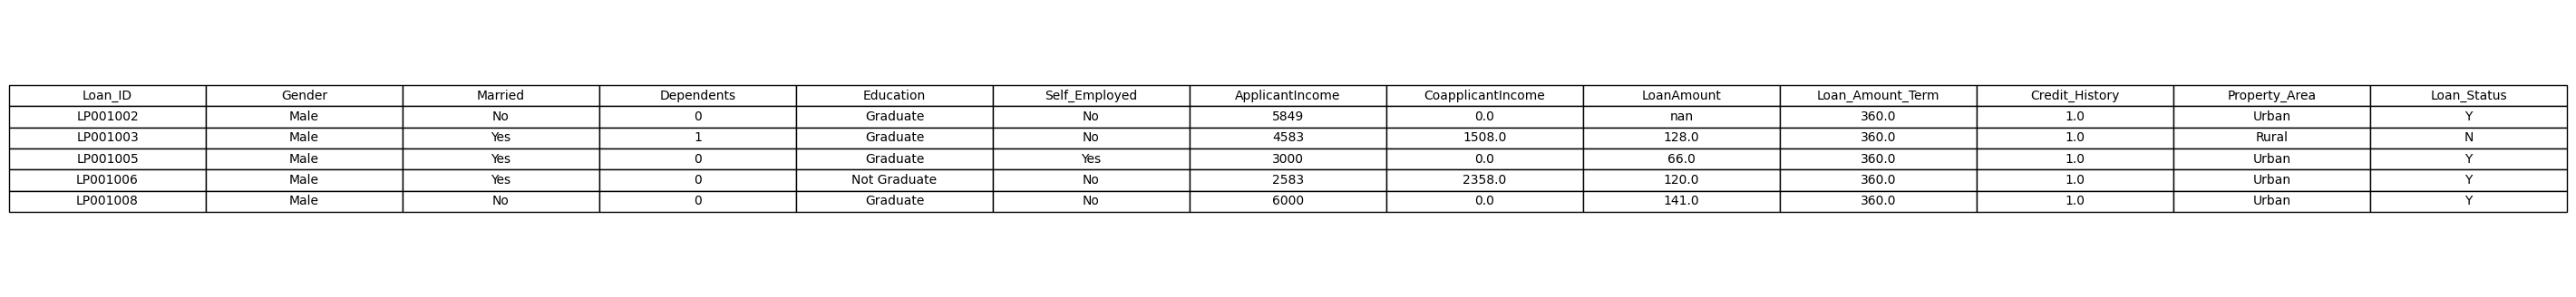

In [53]:
# Select first 5 rows of data
df = train_data.head()

# Create figure with dynamic width based on number of columns
fig, ax = plt.subplots(figsize=(df.shape[1] * 2, 4))  
ax.axis('off')  # Hide axis

# Create the table
table = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    cellLoc='center',
    loc='center'
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)  
table.scale(1.4, 1.4)

# Save as a larger image
plt.savefig("train_data_large_table.png", bbox_inches='tight', dpi=300)

# Show the table
plt.show()

In [54]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


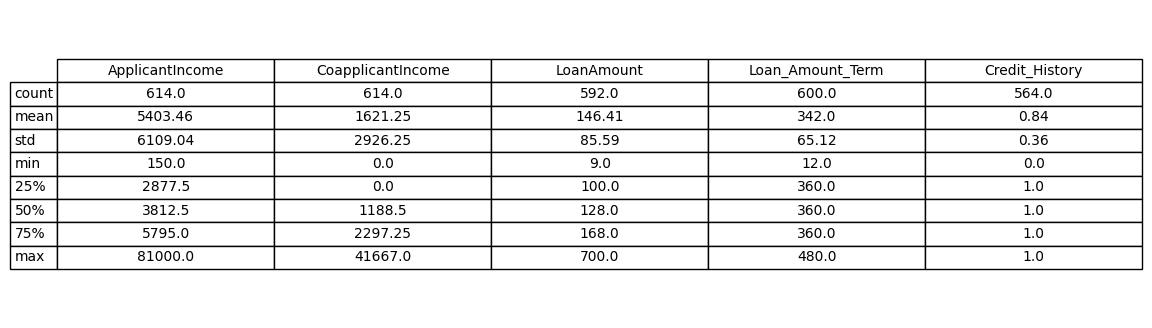

In [55]:
# Get summary stats of numerical columns
summary_df = train_data.describe()
# Set up larger figure size based on number of columns
fig, ax = plt.subplots(figsize=(summary_df.shape[1] * 2, 4))
ax.axis('off')  # Hide axes

# Create the table
table = ax.table(
    cellText=summary_df.values.round(2),     # round numbers for neatness
    rowLabels=summary_df.index,
    colLabels=summary_df.columns,
    cellLoc='center',
    loc='center'
)

# Style settings
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.4)

# Save table as image
plt.savefig("train_data_description.png", bbox_inches='tight', dpi=300)
plt.show()

### Data Preprocessing Overview
Data preprocessing is a crucial step in preparing the dataset for machine learning. This section addresses missing values, encodes categorical variables, handles outliers, and scales numerical features. Proper preprocessing ensures that the data is clean, consistent, and suitable for building robust predictive models.

#### Filling the missing data in the columns

In [56]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
# --- Handle all missing data in one cell ---
# Fill missing values for all relevant columns in train_data

# Gender
train_data['Gender'] = train_data['Gender'].fillna(train_data['Gender'].mode()[0])

# Married
train_data['Married'] = train_data['Married'].fillna(train_data['Married'].mode()[0])

# Dependents
train_data['Dependents'] = train_data['Dependents'].replace('3+', 3)
train_data['Dependents'] = train_data['Dependents'].astype('float')
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].mode()[0]).astype('int')

# Self_Employed
train_data['Self_Employed'] = train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0])

# LoanAmount
train_data['LoanAmount'] = train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())

# Loan_Amount_Term
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median())

# Credit_History
train_data['Credit_History'] = train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0])

# Show that all missing values are handled
print("Missing values after handling:")
print(train_data.isnull().sum())

Missing values after handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


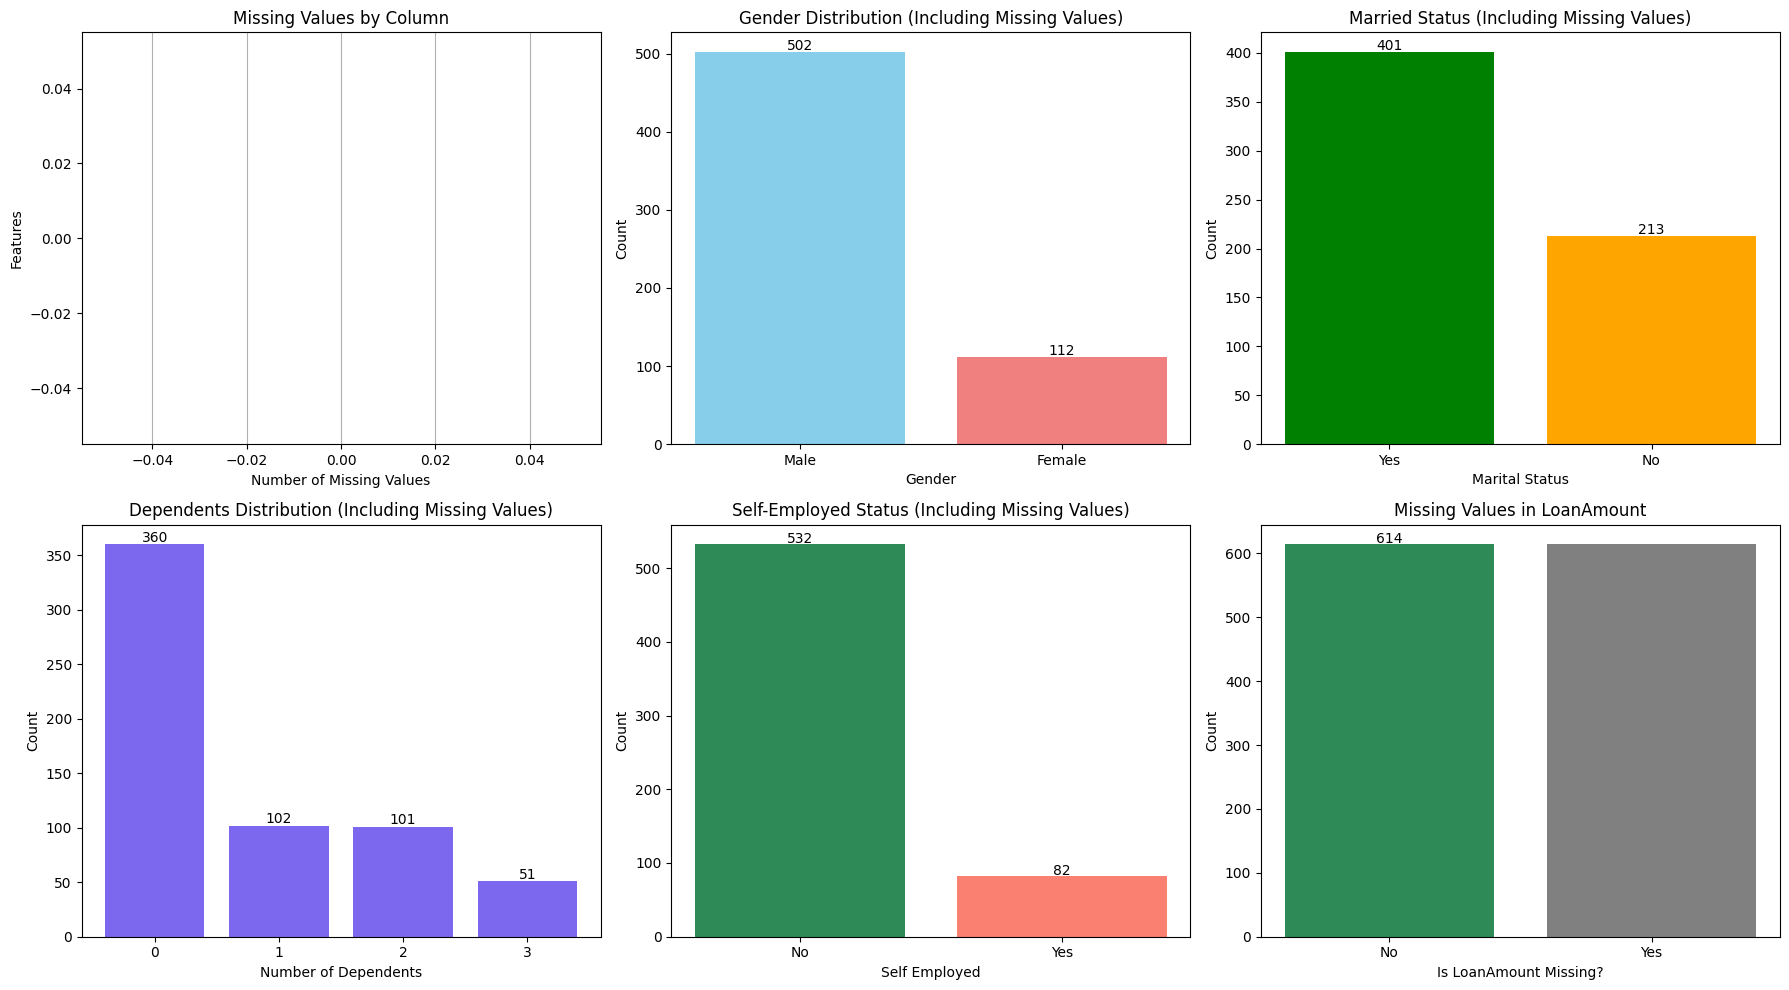

In [58]:
# --- Show all missing data diagrams in one cell ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# 1. Bar chart: Missing values by column
missing = train_data.isnull().sum()
missing = missing[missing > 0].sort_values()
axes[0].barh(missing.index, missing.values, color='coral')
axes[0].set_title("Missing Values by Column")
axes[0].set_xlabel("Number of Missing Values")
axes[0].set_ylabel("Features")
axes[0].grid(axis='x')

# 2. Gender distribution (including missing, before handling)
gender_counts = train_data['Gender'].fillna('Missing').value_counts()
axes[1].bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral', 'gray'])
axes[1].set_title("Gender Distribution (Including Missing Values)")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")
for i, v in enumerate(gender_counts.values):
    axes[1].text(i, v + 2, str(int(v)), ha='center')

# 3. Married status (including missing, before handling)
married_status = train_data['Married'].fillna('Missing')
married_counts = married_status.value_counts()
axes[2].bar(married_counts.index, married_counts.values, color=['green', 'orange', 'gray'])
axes[2].set_title("Married Status (Including Missing Values)")
axes[2].set_xlabel("Marital Status")
axes[2].set_ylabel("Count")
for i, v in enumerate(married_counts.values):
    axes[2].text(i, v + 2, str(int(v)), ha='center')

# 4. Dependents distribution (including missing, before handling)
dependents_data = train_data['Dependents'].fillna('Missing')
dependents_counts = dependents_data.value_counts()
axes[3].bar(dependents_counts.index.astype(str), dependents_counts.values, color='mediumslateblue')
axes[3].set_title("Dependents Distribution (Including Missing Values)")
axes[3].set_xlabel("Number of Dependents")
axes[3].set_ylabel("Count")
for i, v in enumerate(dependents_counts.values):
    axes[3].text(i, v + 2, str(int(v)), ha='center')

# 5. Self_Employed status (including missing, before handling)
self_employed_data = train_data['Self_Employed'].fillna('Missing')
self_employed_counts = self_employed_data.value_counts()
axes[4].bar(self_employed_counts.index, self_employed_counts.values, color=['seagreen', 'salmon', 'gray'])
axes[4].set_title("Self-Employed Status (Including Missing Values)")
axes[4].set_xlabel("Self Employed")
axes[4].set_ylabel("Count")
for i, v in enumerate(self_employed_counts.values):
    axes[4].text(i, v + 2, str(int(v)), ha='center')

# 6. LoanAmount missing values
train_data['LoanAmount_Missing'] = train_data['LoanAmount'].isnull()
axes[5].bar(['No', 'Yes'], train_data['LoanAmount_Missing'].value_counts().sort_index().values, color=['seagreen', 'gray'])
axes[5].set_title("Missing Values in LoanAmount")
axes[5].set_xlabel("Is LoanAmount Missing?")
axes[5].set_ylabel("Count")
for i, v in enumerate(train_data['LoanAmount_Missing'].value_counts().sort_index().values):
    axes[5].text(i, v + 2, str(int(v)), ha='center')

plt.tight_layout()
plt.show()

In [59]:
print("\nColumn names: ")
for column in train_data.columns:
    print(column)


Column names: 
Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status
LoanAmount_Missing


### Counts

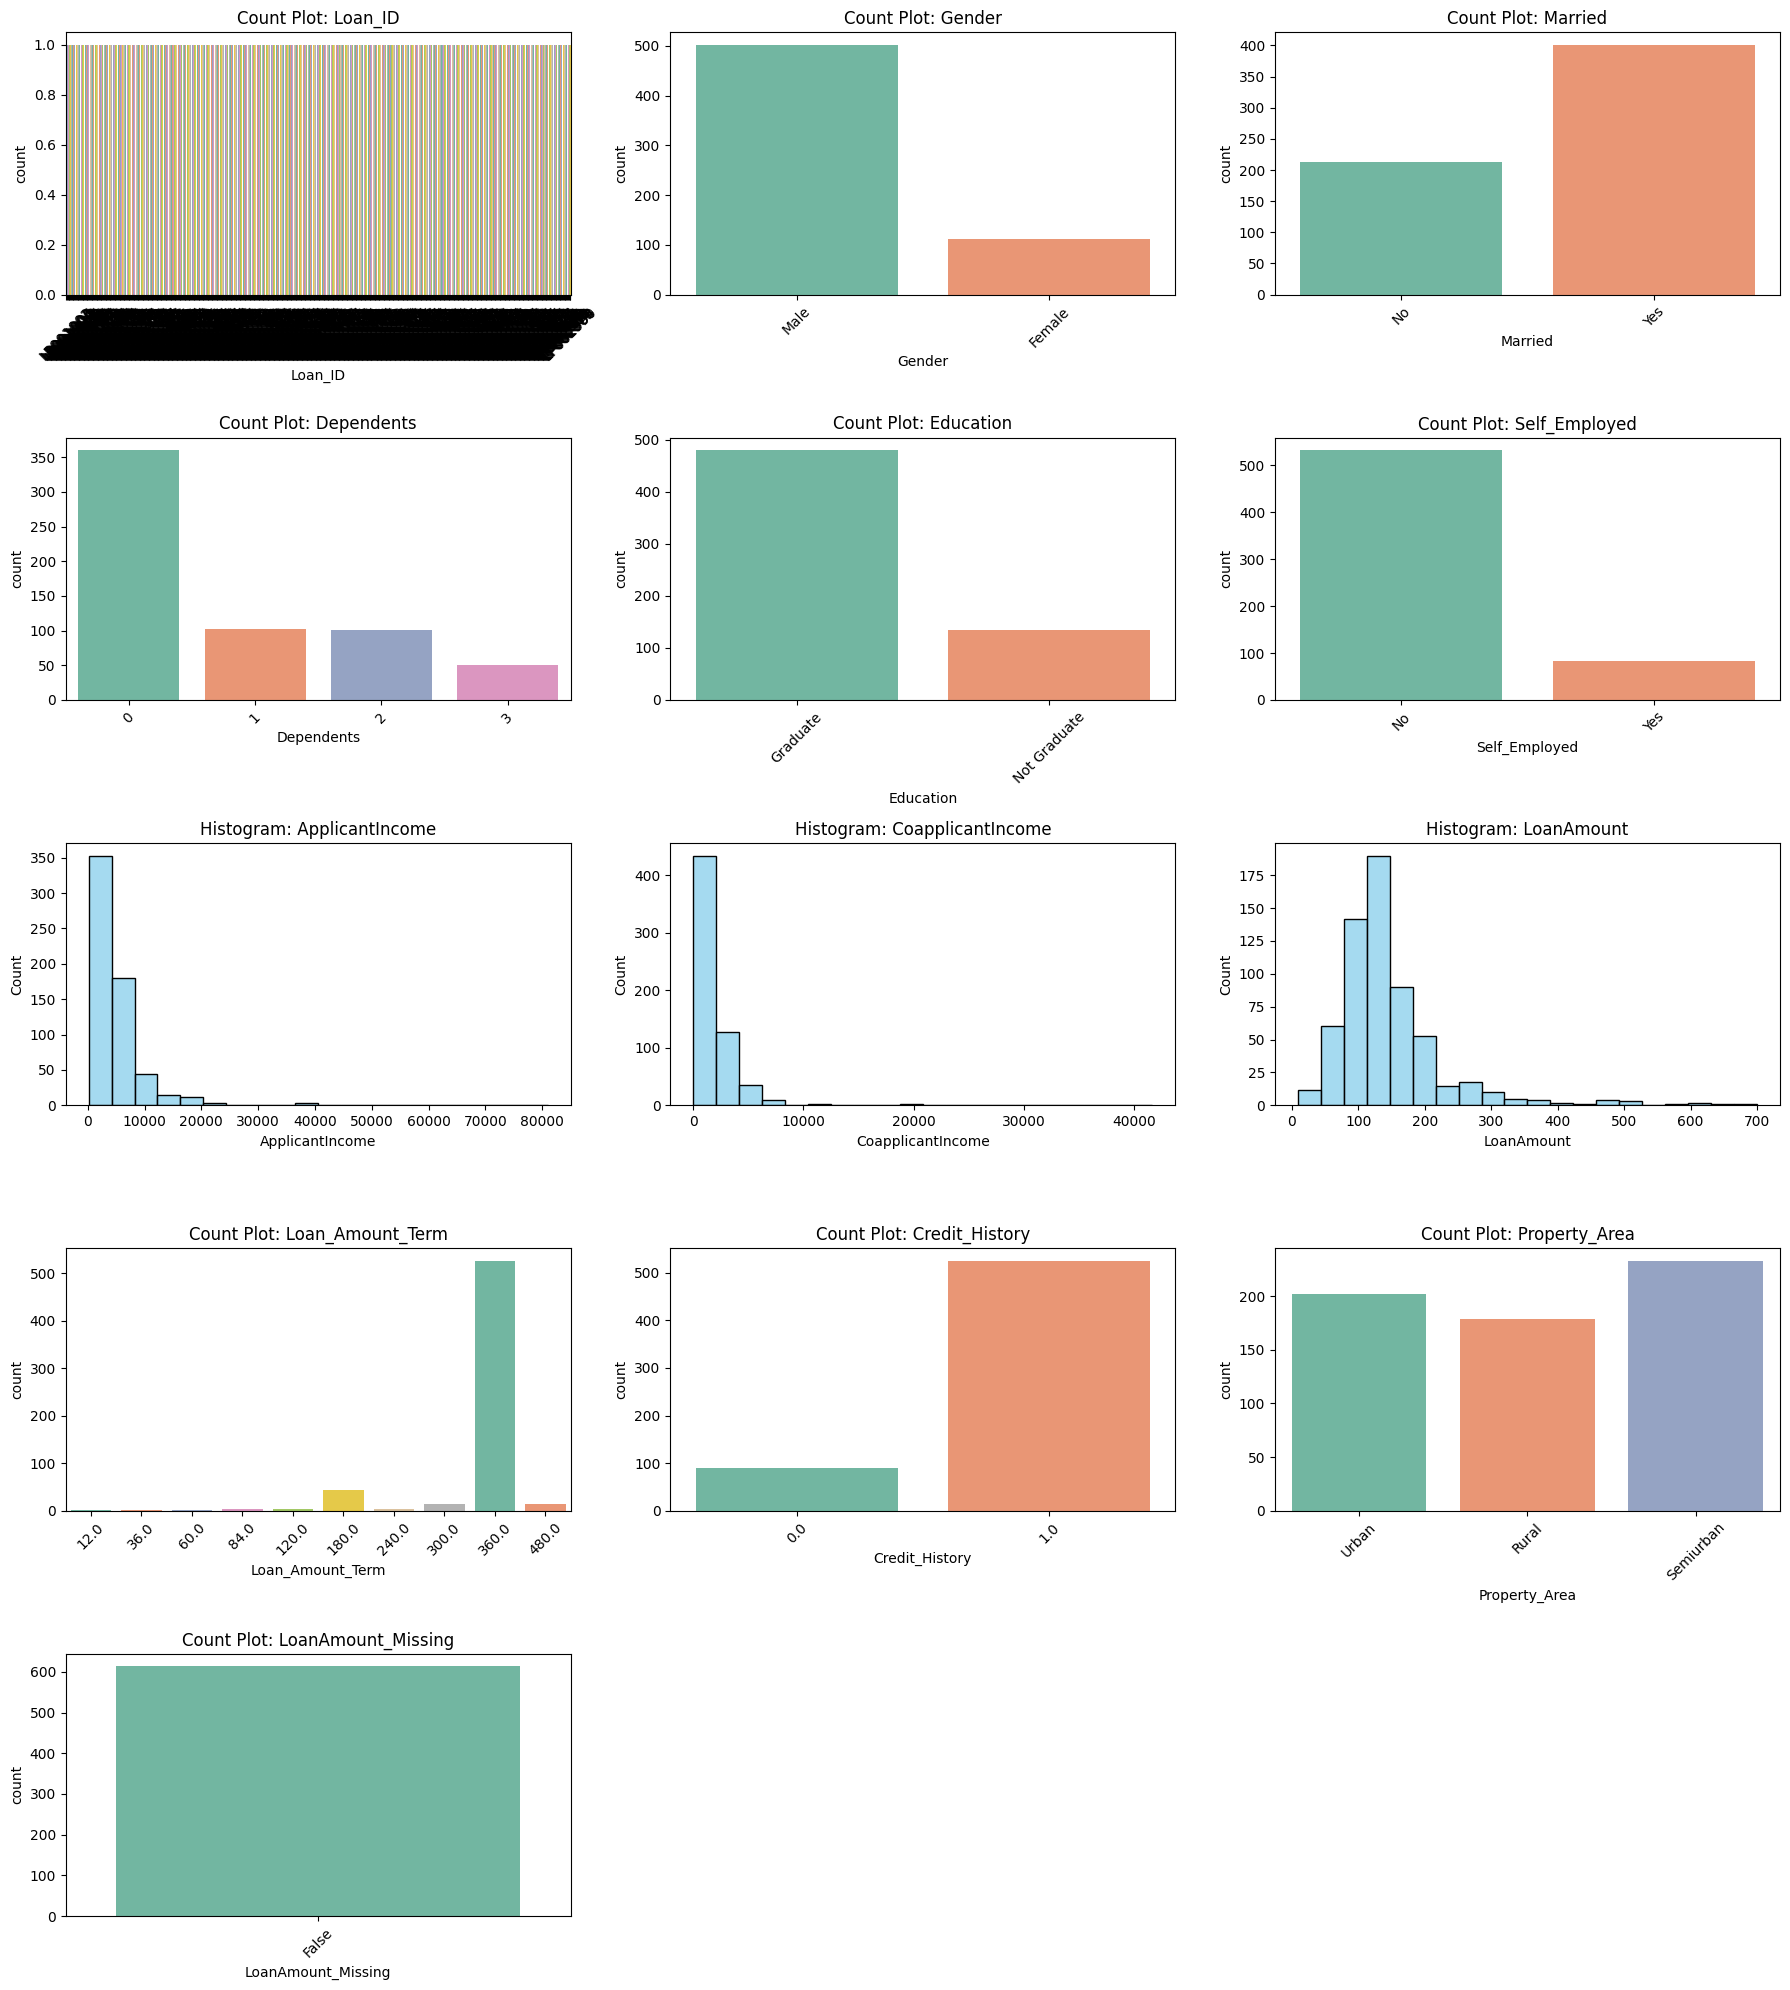

In [60]:
import seaborn as sns

# Plot count plots for all features in train_data

import matplotlib.pyplot as plt

# List of features to plot
features = train_data.columns.tolist()

# Exclude target if present
if 'Loan_Status' in features:
    features.remove('Loan_Status')

n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for idx, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, idx)
    if train_data[feature].dtype == 'object' or train_data[feature].nunique() < 15:
        # Categorical or low cardinality: countplot
        sns.countplot(x=feature, data=train_data, palette='Set2')
        plt.xticks(rotation=45)
        plt.title(f'Count Plot: {feature}')
    else:
        # Numerical: histogram
        sns.histplot(train_data[feature], kde=False, bins=20, color='skyblue')
        plt.title(f'Histogram: {feature}')
    plt.tight_layout()

plt.show()

### Outlier Treatment
Outlier treatment is essential to ensure that extreme values do not adversely affect model training and performance. In this section, we identify and cap outliers in key numerical features using the Interquartile Range (IQR) method. This helps to reduce the impact of anomalous data points and leads to more robust and reliable machine learning models.


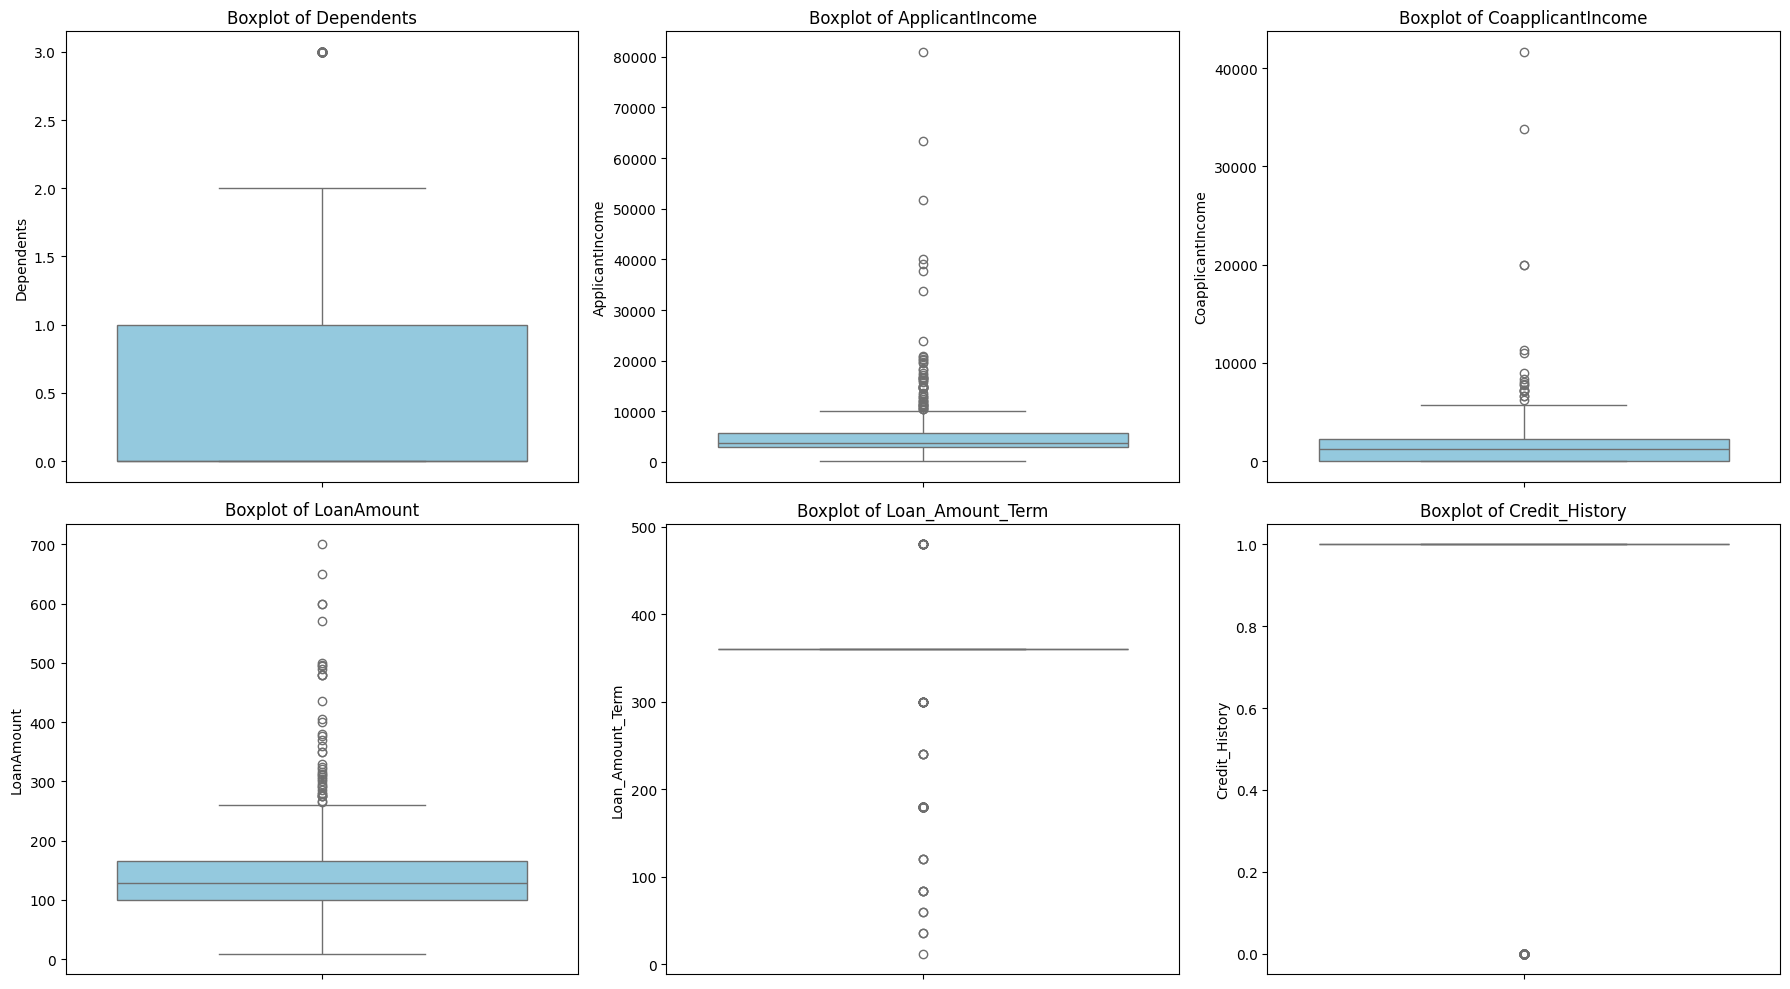

In [61]:
# Exclude the target column from boxplots
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()
if 'Loan_Status' in numerical_cols:
    numerical_cols.remove('Loan_Status')

# Set up the grid for boxplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=train_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### ApplicantIncome feature's outlier fixing

In [62]:
# Fix outliers in ApplicantIncome using IQR capping
Q1 = train_data['ApplicantIncome'].quantile(0.25)
Q3 = train_data['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['ApplicantIncome'] = train_data['ApplicantIncome'].clip(lower=lower_bound, upper=upper_bound)

### CoapplicantIncome feature's outlier fixing

In [63]:
# Fix outliers in CoapplicantIncome using IQR capping
Q1 = train_data['CoapplicantIncome'].quantile(0.25)
Q3 = train_data['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['CoapplicantIncome'] = train_data['CoapplicantIncome'].clip(lower=lower_bound, upper=upper_bound)

### LoanAmount feature's outlier fixing

In [64]:
# Fix outliers in LoanAmount using IQR capping
Q1 = train_data['LoanAmount'].quantile(0.25)
Q3 = train_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['LoanAmount'] = train_data['LoanAmount'].clip(lower=lower_bound, upper=upper_bound)

### Loan_Amount_Term feature's outlier fixing

In [65]:
# Fix outliers in Loan_Amount_Term using IQR capping
Q1 = train_data['Loan_Amount_Term'].quantile(0.25)
Q3 = train_data['Loan_Amount_Term'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].clip(lower=lower_bound, upper=upper_bound)

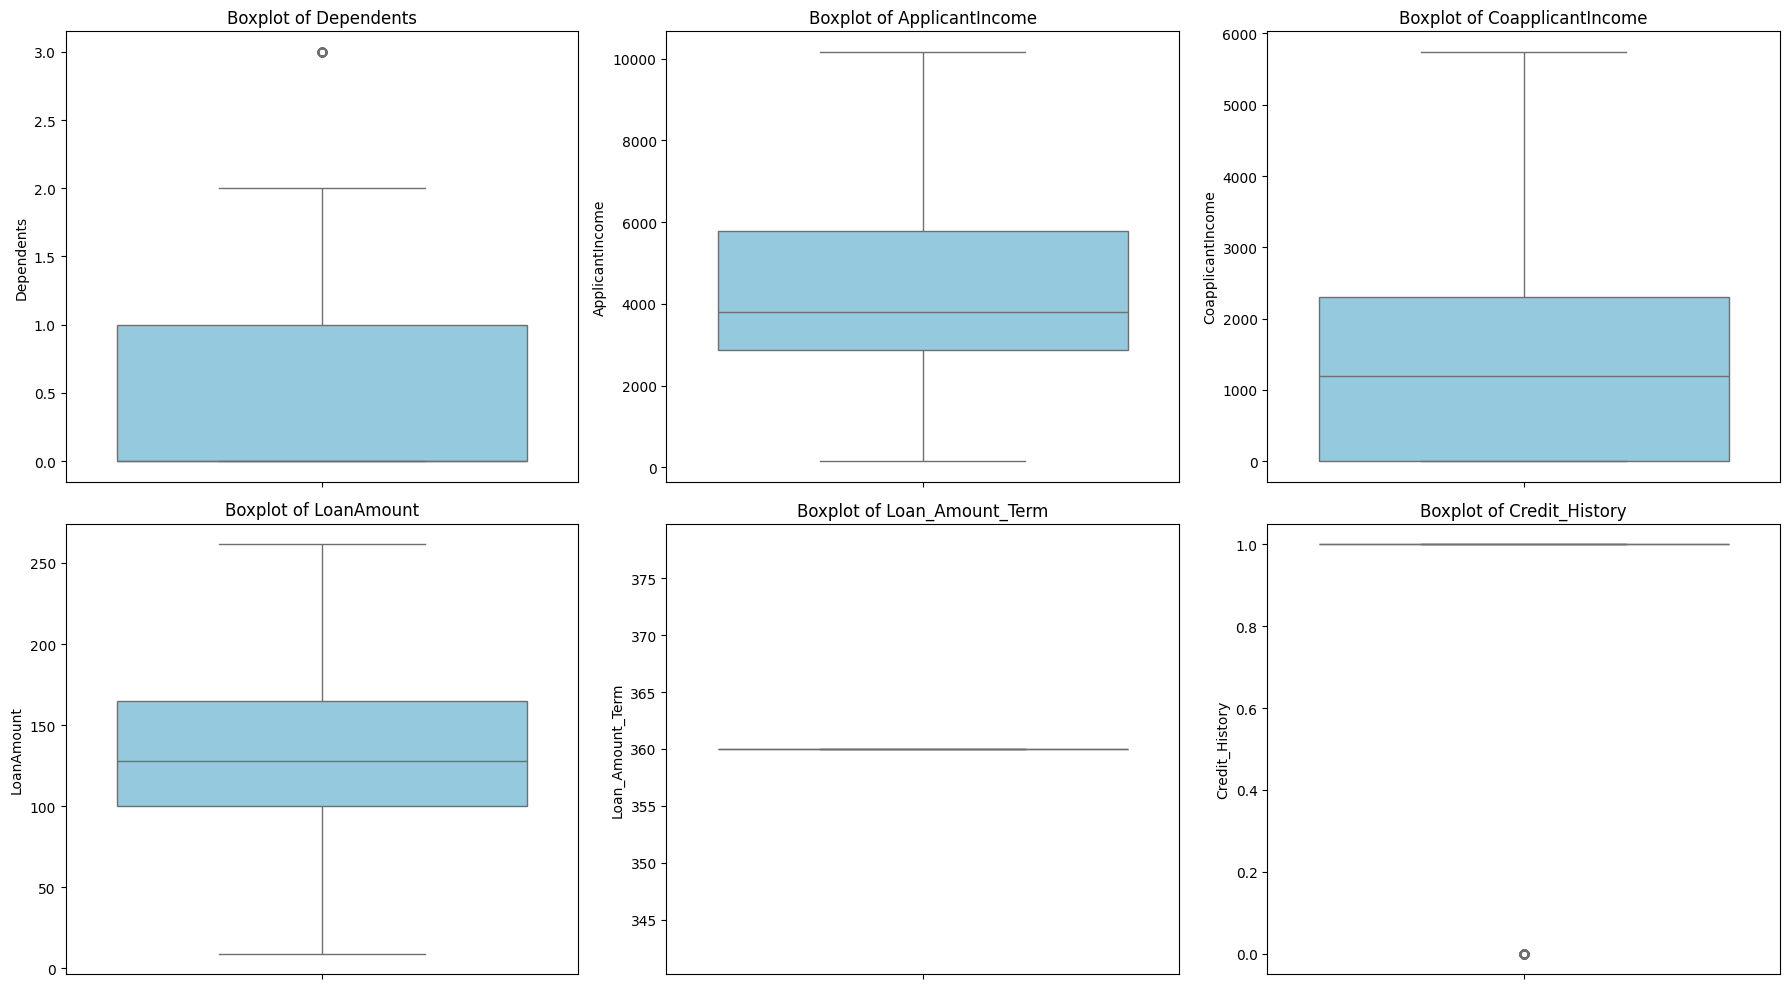

In [66]:
# Exclude the target column from boxplots
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()
if 'Loan_Status' in numerical_cols:
    numerical_cols.remove('Loan_Status')

# Set up the grid for boxplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 5 * n_rows))

for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=train_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Encoding the categorical features
Encoding categorical features is necessary to convert non-numeric data into a format suitable for machine learning algorithms. In this section, we apply label encoding to ordinal features and one-hot encoding to nominal features. This ensures that all input variables are numeric and that the models can interpret the categorical information correctly.

Number of categorical columns: 7
Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number of numerical columns: 6
Numerical columns: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


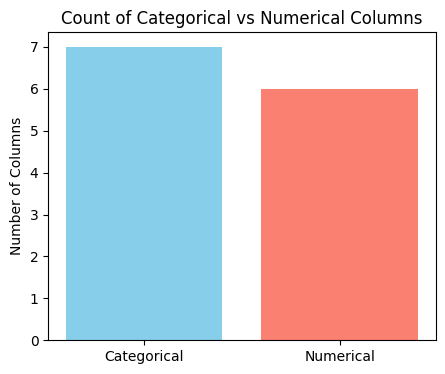

In [67]:
# Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()

# Print the counts and names
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", categorical_cols)
print()
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical columns:", numerical_cols)

# Bar plot
plt.figure(figsize=(5, 4))
plt.bar(['Categorical', 'Numerical'], [len(categorical_cols), len(numerical_cols)], color=['skyblue', 'salmon'])
plt.title('Count of Categorical vs Numerical Columns')
plt.ylabel('Number of Columns')
plt.show()

### Gender feature Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender column and replace original with encoded version
le_gender = LabelEncoder()
train_data['Gender_encoded'] = le_gender.fit_transform(train_data['Gender'])

# Drop the original Gender column
train_data.drop('Gender', axis=1, inplace=True)

# Show the first few rows to verify
print(train_data['Gender_encoded'].head())

0    1
1    1
2    1
3    1
4    1
Name: Gender_encoded, dtype: int64


### Married feature label Encoding

In [69]:
# Encode Married column and replace original with encoded version
le_married = LabelEncoder()
train_data['Married_encoded'] = le_married.fit_transform(train_data['Married'])

# Drop the original Married column
train_data.drop('Married', axis=1, inplace=True)

# Show the first few rows to verify
print(train_data['Married_encoded'].head())

0    0
1    1
2    1
3    1
4    0
Name: Married_encoded, dtype: int64


### Education feature label Encoding

In [70]:
# Encode Education column and replace original with encoded version
le_education = LabelEncoder()
train_data['Education_encoded'] = le_education.fit_transform(train_data['Education'])

# Drop the original Education column
train_data.drop('Education', axis=1, inplace=True)

# Show the first few rows to verify
print(train_data['Education_encoded'].head())

0    0
1    0
2    0
3    1
4    0
Name: Education_encoded, dtype: int64


### Self_Employed feature label Encoding

In [71]:
# Encode Self_Employed column and replace original with encoded version
le_self_employed = LabelEncoder()
train_data['Self_Employed_encoded'] = le_self_employed.fit_transform(train_data['Self_Employed'])

# Drop the original Self_Employed column
train_data.drop('Self_Employed', axis=1, inplace=True)

# Show the first few rows to verify
print(train_data['Self_Employed_encoded'].head())

0    0
1    0
2    1
3    0
4    0
Name: Self_Employed_encoded, dtype: int64


### Property_Area feature One Hot Encoding

In [72]:
if 'Property_Area' in train_data.columns:
    property_area_dummies = pd.get_dummies(train_data['Property_Area'], prefix='Property_Area', dtype=int)
    train_data.drop('Property_Area', axis=1, inplace=True)
    train_data = pd.concat([train_data, property_area_dummies], axis=1)
    print(train_data.head())
else:
    print("Property_Area column is already removed.")

    Loan_ID  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0  LP001002           0           5849.0                0.0       128.0   
1  LP001003           1           4583.0             1508.0       128.0   
2  LP001005           0           3000.0                0.0        66.0   
3  LP001006           0           2583.0             2358.0       120.0   
4  LP001008           0           6000.0                0.0       141.0   

   Loan_Amount_Term  Credit_History Loan_Status  LoanAmount_Missing  \
0             360.0             1.0           Y               False   
1             360.0             1.0           N               False   
2             360.0             1.0           Y               False   
3             360.0             1.0           Y               False   
4             360.0             1.0           Y               False   

   Gender_encoded  Married_encoded  Education_encoded  Self_Employed_encoded  \
0               1                0        

In [73]:
print([col for col in train_data.columns if col.startswith('Property_Area_')])

['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']


In [74]:
# Remove duplicate columns by keeping only the first occurrence
train_data = train_data.loc[:, ~train_data.columns.duplicated()]

# Verify the columns
print([col for col in train_data.columns if col.startswith('Property_Area_')])

['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']


Number of categorical columns: 2
Categorical columns: ['Loan_ID', 'Loan_Status']

Number of numerical columns: 13
Numerical columns: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']


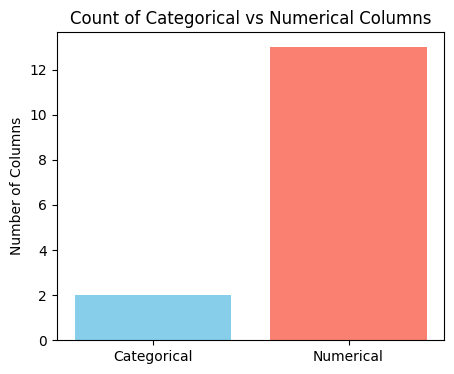

In [75]:
# Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()

# Print the counts and names
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", categorical_cols)
print()
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical columns:", numerical_cols)

# Bar plot
plt.figure(figsize=(5, 4))
plt.bar(['Categorical', 'Numerical'], [len(categorical_cols), len(numerical_cols)], color=['skyblue', 'salmon'])
plt.title('Count of Categorical vs Numerical Columns')
plt.ylabel('Number of Columns')
plt.show()

### Dropping the Loan_ID feature

In [76]:
train_data.drop('Loan_ID', axis=1, inplace=True)
train_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Missing,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,Y,False,1,0,0,0,0,0,1
1,1,4583.0,1508.0,128.0,360.0,1.0,N,False,1,1,0,0,1,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,Y,False,1,1,0,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,Y,False,1,1,1,0,0,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,Y,False,1,0,0,0,0,0,1


### Loan_Status (Target feature) label Encoding

In [77]:
train_data['Loan_Status'] = train_data['Loan_Status'].map({'Y': 1, 'N': 0})


In [78]:
train_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_Missing,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,1,False,1,0,0,0,0,0,1
1,1,4583.0,1508.0,128.0,360.0,1.0,0,False,1,1,0,0,1,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,False,1,1,0,1,0,0,1
3,0,2583.0,2358.0,120.0,360.0,1.0,1,False,1,1,1,0,0,0,1
4,0,6000.0,0.0,141.0,360.0,1.0,1,False,1,0,0,0,0,0,1


Number of categorical columns: 0
Categorical columns: []

Number of numerical columns: 14
Numerical columns: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_encoded', 'Married_encoded', 'Education_encoded', 'Self_Employed_encoded', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']


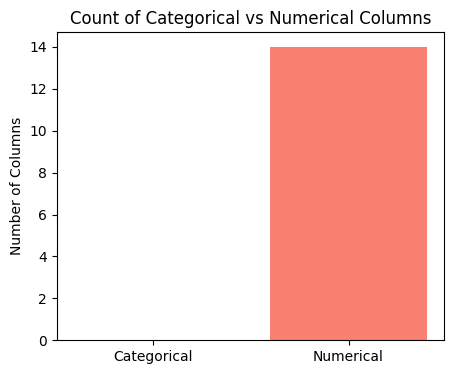

In [79]:
# Identify categorical and numerical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()

# Print the counts and names
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", categorical_cols)
print()
print(f"Number of numerical columns: {len(numerical_cols)}")
print("Numerical columns:", numerical_cols)

# Bar plot
plt.figure(figsize=(5, 4))
plt.bar(['Categorical', 'Numerical'], [len(categorical_cols), len(numerical_cols)], color=['skyblue', 'salmon'])
plt.title('Count of Categorical vs Numerical Columns')
plt.ylabel('Number of Columns')
plt.show()

In [80]:
# Move 'Loan_Status' column to the end
loan_status = train_data.pop('Loan_Status')
train_data['Loan_Status'] = loan_status

# Verify the new column order
print(train_data.columns)

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_Missing',
       'Gender_encoded', 'Married_encoded', 'Education_encoded',
       'Self_Employed_encoded', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')


### Correlation Matrix of Features

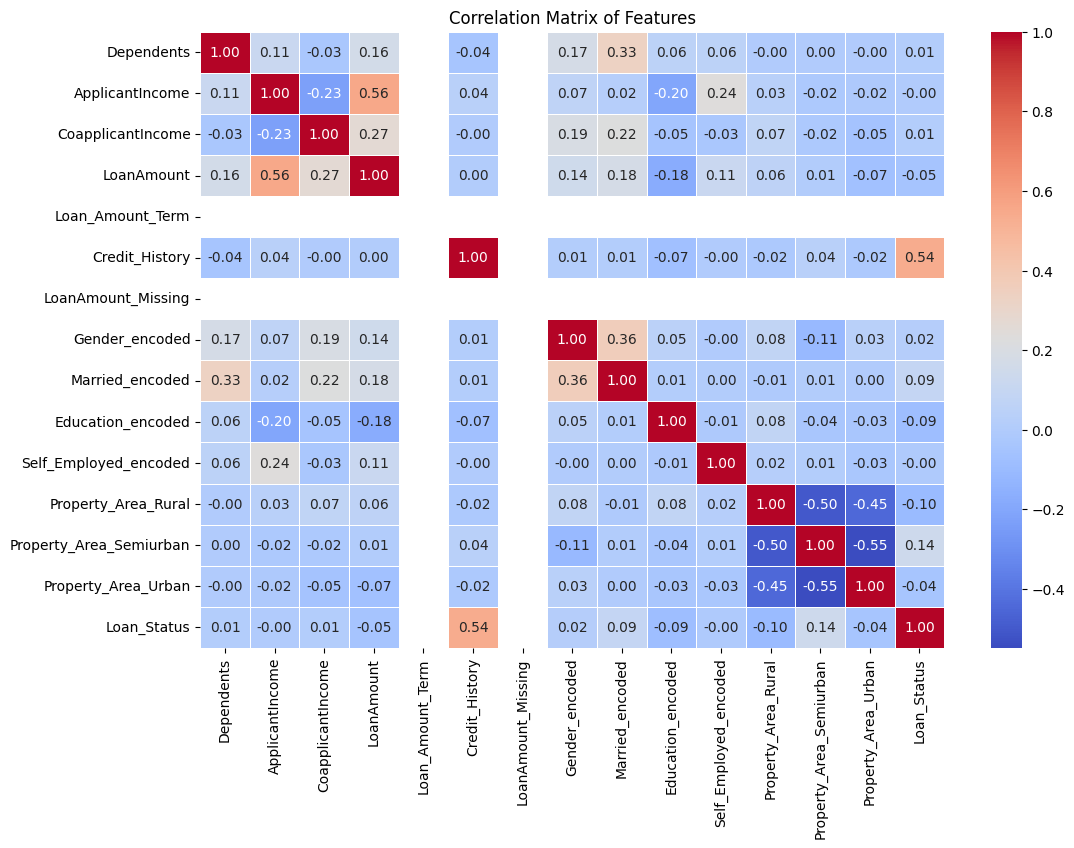

In [81]:
# Compute the correlation matrix
corr_matrix = train_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

### Scaling (Standardization)
Feature scaling is an important preprocessing step that ensures all numerical variables are on a similar scale. In this section, we apply standardization to transform features so they have a mean of zero and a standard deviation of one. This helps many machine learning algorithms converge faster and perform better, especially those that rely on distance calculations or gradient-based optimization.

In [82]:
#Before Scaling
train_data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_Missing,Gender_encoded,Married_encoded,Education_encoded,Self_Employed_encoded,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,5849.0,0.0,128.0,360.0,1.0,False,1,0,0,0,0,0,1,1
1,1,4583.0,1508.0,128.0,360.0,1.0,False,1,1,0,0,1,0,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,False,1,1,0,1,0,0,1,1
3,0,2583.0,2358.0,120.0,360.0,1.0,False,1,1,1,0,0,0,1,1
4,0,6000.0,0.0,141.0,360.0,1.0,False,1,0,0,0,0,0,1,1


In [83]:
from sklearn.preprocessing import StandardScaler
# Separate the features (X) from the target (y)
# We use errors='ignore' in case 'Loan_ID' was already dropped
X = train_data.drop(columns=['Loan_Status', 'Loan_ID'], errors='ignore')
y = train_data['Loan_Status']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features and original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled data to verify
print("Scaled Features DataFrame:")
print(X_scaled_df.head())

Scaled Features DataFrame:
   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0   -0.737806         0.497164          -0.874587   -0.168041   
1    0.253470        -0.013767           0.054395   -0.168041   
2   -0.737806        -0.652632          -0.874587   -1.280462   
3   -0.737806        -0.820924           0.578025   -0.311579   
4   -0.737806         0.558104          -0.874587    0.065209   

   Loan_Amount_Term  Credit_History  LoanAmount_Missing  Gender_encoded  \
0               0.0        0.411733                 0.0        0.472343   
1               0.0        0.411733                 0.0        0.472343   
2               0.0        0.411733                 0.0        0.472343   
3               0.0        0.411733                 0.0        0.472343   
4               0.0        0.411733                 0.0        0.472343   

   Married_encoded  Education_encoded  Self_Employed_encoded  \
0        -1.372089          -0.528362              -0.392601   
1  

In [84]:
print(train_data.head())
print(X_scaled_df.head())

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0           5849.0                0.0       128.0   
1           1           4583.0             1508.0       128.0   
2           0           3000.0                0.0        66.0   
3           0           2583.0             2358.0       120.0   
4           0           6000.0                0.0       141.0   

   Loan_Amount_Term  Credit_History  LoanAmount_Missing  Gender_encoded  \
0             360.0             1.0               False               1   
1             360.0             1.0               False               1   
2             360.0             1.0               False               1   
3             360.0             1.0               False               1   
4             360.0             1.0               False               1   

   Married_encoded  Education_encoded  Self_Employed_encoded  \
0                0                  0                      0   
1                1            

### Feature Engineering
Feature engineering involves creating new features or transforming existing ones to improve model performance. In this section, we analyze feature correlations, select the most relevant features, and construct new variables if needed. Effective feature engineering can help models capture important patterns in the data and boost predictive accuracy.

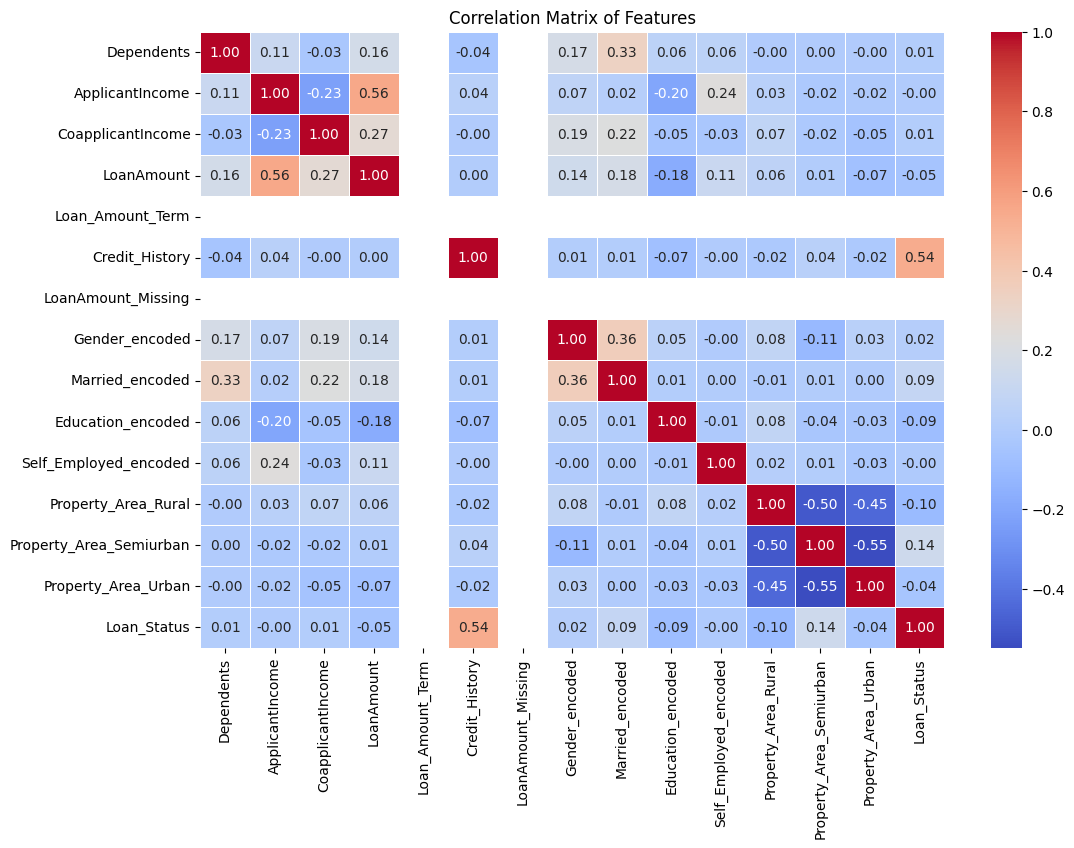

In [85]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [86]:
# Get correlation of all features with the target variable 'Loan_Status'
correlation_with_target = train_data.corr()['Loan_Status'].sort_values(ascending=False)
print(correlation_with_target)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married_encoded            0.091478
Gender_encoded             0.017987
CoapplicantIncome          0.011983
Dependents                 0.010118
ApplicantIncome           -0.000442
Self_Employed_encoded     -0.003700
Property_Area_Urban       -0.043621
LoanAmount                -0.047262
Education_encoded         -0.085884
Property_Area_Rural       -0.100694
Loan_Amount_Term                NaN
LoanAmount_Missing              NaN
Name: Loan_Status, dtype: float64


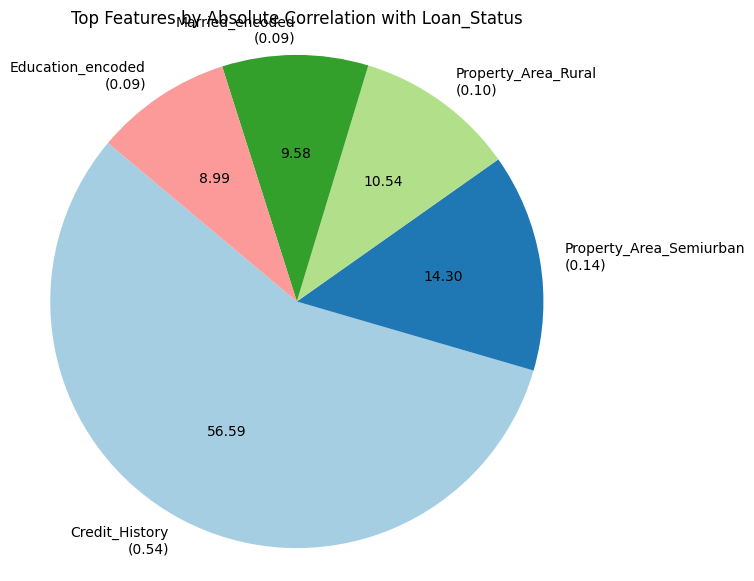

In [87]:
# Pie chart of features with highest correlation to target
corr_with_target = train_data.corr()['Loan_Status'].drop('Loan_Status')
abs_corr = corr_with_target.abs()

# Select top N features (e.g., top 5)
top_n = 5
if len(abs_corr) < top_n:
    top_n = len(abs_corr)
top_features = abs_corr.sort_values(ascending=False).head(top_n)

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(top_features, labels=[f"{feat}\n({corr:.2f})" for feat, corr in zip(top_features.index, top_features.values)],
        autopct='%1.2f', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top Features by Absolute Correlation with Loan_Status')
plt.axis('equal')
plt.show()

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    float64
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   LoanAmount_Missing       614 non-null    bool   
 7   Gender_encoded           614 non-null    int64  
 8   Married_encoded          614 non-null    int64  
 9   Education_encoded        614 non-null    int64  
 10  Self_Employed_encoded    614 non-null    int64  
 11  Property_Area_Rural      614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status              6

### ANOVA Feature Selection
ANOVA (Analysis of Variance) is a statistical method used to identify which features are most relevant for predicting the target variable. In this section, we use the ANOVA F-value to select the top features that have the strongest relationship with the loan approval status. By focusing on these high-impact features, we can improve model performance, reduce overfitting, and simplify the model. This step helps ensure that only the most informative variables are used in the subsequent machine learning workflow.

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif

# Ensure X and y are defined as in previous cells
# X = train_data.drop(columns=['Loan_Status', 'Loan_ID'], errors='ignore')
# y = train_data['Loan_Status']

# Apply SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X_scaled_df, y)

# Get the top 5 feature indices and names
top_indices = selector.get_support(indices=True)
top_features = X_scaled_df.columns[top_indices]
top_scores = selector.scores_[top_indices]

print("Top 5 features selected by ANOVA F-value:")
for feature, score in zip(top_features, top_scores):
    print(f"{feature}: F-score = {score:.2f}")

# Optionally, create a new DataFrame with only these features for training
X_selected = X_scaled_df[top_features]
X_selected.head()

Top 5 features selected by ANOVA F-value:
Credit_History: F-score = 252.65
Married_encoded: F-score = 5.16
Education_encoded: F-score = 4.55
Property_Area_Rural: F-score = 6.27
Property_Area_Semiurban: F-score = 11.63


,Credit_History,Married_encoded,Education_encoded,Property_Area_Rural,Property_Area_Semiurban
0,0.411733,-1.372089,-0.528362,-0.641478,-0.782016
1,0.411733,0.728816,-0.528362,1.558899,-0.782016
2,0.411733,0.728816,-0.528362,-0.641478,-0.782016
3,0.411733,0.728816,1.892641,-0.641478,-0.782016
4,0.411733,-1.372089,-0.528362,-0.641478,-0.782016


### Hyperparameter Tuning for Multiple Models Using GridSearchCV
Hyperparameter tuning is a critical step in optimizing machine learning models. In this section, we use GridSearchCV to systematically search for the best combination of hyperparameters for several classification algorithms, including Logistic Regression, Random Forest, SVM, and KNN. GridSearchCV evaluates model performance across different parameter settings using cross-validation, helping to identify the configuration that yields the highest accuracy. This process ensures that each model is fine-tuned for optimal predictive performance on the loan approval dataset.

In [90]:
# Hyperparameter tuning for multiple models using GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Ensure X_selected and y are defined (from previous feature selection and scaling steps)
# If not, fallback to X_scaled_df and y
try:
    X_tune = X_selected
except NameError:
    X_tune = X_scaled_df

# Split data for tuning (stratify for balanced classes)
X_train, X_val, y_train, y_val = train_test_split(
    X_tune, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

best_estimators = {}

for name, model in models.items():
    print(f'\nTuning hyperparameters for {name}...')
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    print('Best parameters:', grid.best_params_)
    print('Best cross-validated accuracy:', grid.best_score_)
    best_estimators[name] = grid.best_estimator_

# Now best_estimators contains the best model for each algorithm after tuning


Tuning hyperparameters for Logistic Regression...
Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.7983714698000413

Tuning hyperparameters for Random Forest...
Best parameters: {'C': 0.01, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.7983714698000413

Tuning hyperparameters for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy: 0.7983714698000413

Tuning hyperparameters for SVM...
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validated accuracy: 0.7983714698000413

Tuning hyperparameters for KNN...
Best parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validated accuracy: 0.7983714698000413
Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy: 0.7983714698000413

Tuning hyperparameters for SVM...
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best cross-validated accuracy: 0.7

In [91]:
# Evaluate the best (tuned) models on the validation set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results_tuned = []

for name, best_model in best_estimators.items():
    y_pred = best_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results_tuned.append({'Model': name, 'Accuracy': acc})
    print(f'\n{name} (Tuned)')
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', confusion_matrix(y_val, y_pred))
    print('Classification Report:\n', classification_report(y_val, y_pred))

# Show summary table for tuned models
results_tuned_df = pd.DataFrame(results_tuned).sort_values(by='Accuracy', ascending=False)
print('\nTuned Model Comparison:')
print(results_tuned_df)


Logistic Regression (Tuned)
Accuracy: 0.8536585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Random Forest (Tuned)
Accuracy: 0.8455284552845529
Confusion Matrix:
 [[21 17]
 [ 2 83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123


SVM (Tuned)
Accuracy: 0.8536585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
         

### Comparing Model Performance: All Features vs Selected Features
We will now train and tune the same classification models (Logistic Regression, Random Forest, SVM, KNN) using **all available features** (after scaling), and compare their performance to the models trained on the top 5 ANOVA-selected features. This helps us understand the impact of feature selection on model accuracy and generalization.

In [92]:
# Train, tune, and evaluate models using ALL features (X_scaled_df)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Split the data (use same random_state for fair comparison)
X_train_all, X_val_all, y_train_all, y_val_all = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

# Define models and parameter grids
models_all = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

param_grids_all = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

best_estimators_all = {}
results_all = []

for name, model in models_all.items():
    print(f'\nTuning hyperparameters for {name} (All Features)...')
    grid = GridSearchCV(model, param_grids_all[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_all, y_train_all)
    print('Best parameters:', grid.best_params_)
    print('Best cross-validated accuracy:', grid.best_score_)
    best_estimators_all[name] = grid.best_estimator_

    # Evaluate on validation set
    y_pred = grid.best_estimator_.predict(X_val_all)
    acc = accuracy_score(y_val_all, y_pred)
    results_all.append({'Model': name, 'Accuracy': acc})
    print('Validation Accuracy:', acc)
    print('Confusion Matrix:\n', confusion_matrix(y_val_all, y_pred))
    print('Classification Report:\n', classification_report(y_val_all, y_pred))

# Show summary table for all-features models
results_all_df = pd.DataFrame(results_all).sort_values(by='Accuracy', ascending=False)
print('\nAll Features Model Comparison:')
print(results_all_df)


Tuning hyperparameters for Logistic Regression (All Features)...
Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.8003916718202433
Validation Accuracy: 0.8536585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123


Tuning hyperparameters for Random Forest (All Features)...
Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy: 0.7983714698000413
Validation Accuracy: 0.8536585365853658
Confusion Matrix:
 [[21 17]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
       

,Model,Accuracy
0,Logistic Regression,0.853659
1,Random Forest,0.853659
2,SVM,0.853659
3,KNN,0.829268


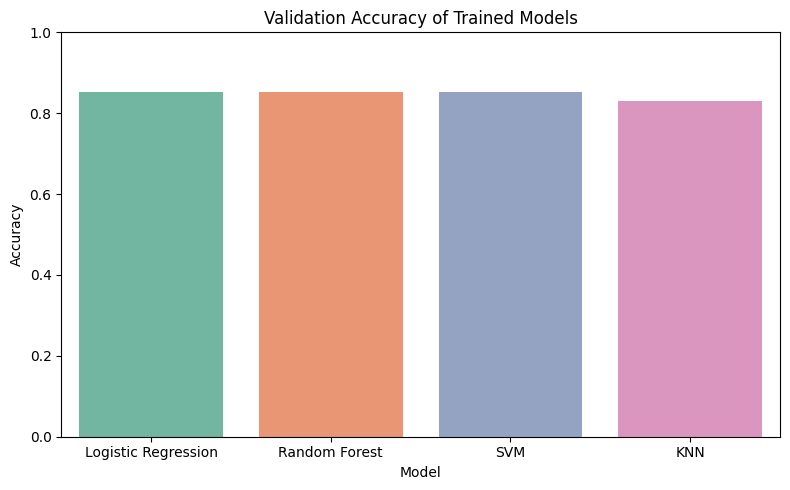

In [93]:
# --- Model Comparison Table and Diagram ---
import matplotlib.pyplot as plt
import seaborn as sns

# This cell displays a comparison table and a bar plot of validation accuracies for all trained models.
# The table shows the accuracy of each model, and the bar plot provides a visual comparison.
# Ensure that the previous model training and evaluation cells have been run to populate 'results_all_df'.

# Display the comparison table and plot if available
if 'results_all_df' in globals():
    display(results_all_df)
    # Bar plot of model accuracy
    plt.figure(figsize=(8, 5))
    sns.barplot(data=results_all_df, x='Model', y='Accuracy', palette='Set2')
    plt.title('Validation Accuracy of Trained Models')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.tight_layout()
    plt.show()
else:
    print("results_all_df is not defined. Please ensure you have run the model training and evaluation cell above.")

### Model Comparison Table and Diagram
This section displays a comparison table and a bar plot of the validation accuracies for all trained models. The table summarizes the accuracy of each model, while the bar plot provides a visual comparison. 

### Saving the best model using joblib

In [95]:
# Save the best model (highest accuracy) using joblib
import joblib
import os

# Ensure the Model directory exists
model_dir = r"D:/Machine Learning/Loan-Approval-Prediction/Model"
os.makedirs(model_dir, exist_ok=True)

# Find the best model from results_all_df
if 'results_all_df' in globals() and 'best_estimators_all' in globals():
    best_model_name = results_all_df.iloc[0]['Model']
    best_model = best_estimators_all[best_model_name]
    model_path = os.path.join(model_dir, f"best_model_{best_model_name.replace(' ', '_')}.joblib")
    joblib.dump(best_model, model_path)
    print(f"Best model '{best_model_name}' saved to: {model_path}")
else:
    print("Model comparison or best_estimators_all not found. Please run the previous cells to train and compare models.")

Best model 'Logistic Regression' saved to: D:/Machine Learning/Loan-Approval-Prediction/Model\best_model_Logistic_Regression.joblib
